<h3> NEW BRANCH? </h3>


INTRODUCTION:


- Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal:


Forest fires are a type of  uncontrolled and unwanted fire that occurs in areas with a high amount of vegetation. Unlike controlled fires, which provides benefits for the ecology, these unwated forest fires usually have a negative impact, especially because they're harder to control. Forest fires release a large amount of smoke, which causes air pollution that can persist for a long time, travelling far from where the forest fire occured.

Drier, hotter conditions mean that forest fires are more likely to occur. Therefore, we believe that forest fires are affected by weather conditions. Moreover, because to the Earth's temperature increasing due to global warming, the number of forest fires have risen by 13% from 2019 to 2020.


- Clearly state the question you will try to answer with your project


In this project, we hope that we can predict whether a forest fire will occur when given the temperature, rain, and other weather conditions.


- Identify and describe the dataset that will be used to answer the question


In 2007, forest fires in the Atlast Mountains, located on the northern coast of Algeria, killed several people as it spread rapidly due to hot, dry winds. Our dataset contains weather information on the Sidi Bel Abbès and the Bejaia region, and includes information such as :
- `day`,`month`,`year`: the date of the information
- `Temperature`: the maximum temperature in degrees celcius, ranging from 22 to 42
- `RH` : Relative humidity in percentages
- `Ws` : wind speed in kilometers per hour
- `Rain`: total amount of rain, in mm


The data set also includes other FWI (fire weather index) information, such as:
- `FFMC`: Fine Fuel Moisture Code
- `DMC` : dull Moisture Code
- `DC`: Drought Code 
-`ISI`: Initial Spread Index
-`BUI`: Buildup Index
-`FWI`: Fire Weather Index

Finally, it also mentions whether or not a forest fire was reported on that day, under the `Classes` column

Preliminary exploratory data analysis:

- Demonstrate that the dataset can be read from the web into R 

First of, before we read the dataset, we need to load the necessary libraries:

In [156]:
library(tidyverse)
library(repr)
library(GGally)

options(repr.matrix.max.rows = 6)

set.seed(123)

We open the data set from the url to inspect it. We can see from looking through that this dataset is comma-delimited and has headers. therefore, we can use the `read_csv` function. However, both regions are "saved" on different datasets, so we need to use the `skip` and `n_max` arguments.


After inspecting the dataset, we can copy and paste the data set's download url from 
[this website](https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++)
and download it to our notebook it using the `read_csv` function.

Because both regions are on different datasets, we need to make 2 datsets, with one corresponding to each region



In [159]:
fire_url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00547/Algerian_forest_fires_dataset_UPDATE.csv"
# this takes the bajaja region
forest_fire_bejaia <- read_csv(fire_url, skip = 1, n_max = 122)
# this takes the sidi region
forest_fire_sidi <- read_csv(fire_url, skip = 126)


#forest_fire_bejaia
#forest_fire_sidi

Parsed with column specification:
cols(
  day = col_character(),
  month = col_character(),
  year = col_double(),
  Temperature = col_double(),
  RH = col_double(),
  Ws = col_double(),
  Rain = col_double(),
  FFMC = col_double(),
  DMC = col_double(),
  DC = col_double(),
  ISI = col_double(),
  BUI = col_double(),
  FWI = col_double(),
  Classes = col_character()
)

Parsed with column specification:
cols(
  day = col_character(),
  month = col_character(),
  year = col_double(),
  Temperature = col_double(),
  RH = col_double(),
  Ws = col_double(),
  Rain = col_double(),
  FFMC = col_double(),
  DMC = col_double(),
  DC = col_character(),
  ISI = col_double(),
  BUI = col_double(),
  FWI = col_character(),
  Classes = col_character()
)

Warning message:
“1 parsing failure.
row col   expected     actual                                                                                                       file
 44  -- 14 columns 13 columns 'https://archive.ics.uci.edu/ml/machine-lear

day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
02,06,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire
03,06,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
14,07,2012,37,37,18,0.2,88.9,12.9,13.6,9,12.5,10.4,fire
14,07,2012,37,37,18,0.2,88.9,12.9,13.6,9,12.5,10.4,fire
14,07,2012,37,37,18,0.2,88.9,12.9,13.6,9,12.5,10.4,fire


day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
01,06,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
28,09,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire
29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire
30,09,2012,25,78,14,1.4,45.0,1.9,7.5,0.2,2.4,0.1,not fire


Preliminary exploratory data analysis:

- Clean and wrangle your data into a tidy format


Now, after looking and reading these, we need to tidy it. All the columns are already "tidy", but there is one row that contains an NA, so we removed it and added it back. Afterwards, we changed the column types, added a column called `Region`and combined both datasets together.

In [195]:
forest_fire_sidi <- forest_fire_sidi %>%
    slice(-44) %>%
    add_row(tibble_row(day = "14", month = "07", year = 2012, 
                       Temperature = 37, RH = 37, Ws = 18, 
                       Rain = 0.2, FFMC = 88.9, DMC = 12.9,
                       DC = 13.6, ISI = 9, BUI = 12.5, FWI = 10.4, Classes = "fire")) %>%
    mutate(DC = as.numeric(DC)) %>%
    mutate(FWI = as.numeric(FWI))



forest_fire_sidi <- forest_fire_sidi %>%
    mutate(Region = "Sidi")

forest_fire_bejaia <- forest_fire_bejaia %>%
    mutate(Region = "Bejaia")


forest_fires <- rbind(forest_fire_sidi, forest_fire_bejaia)

We then remove the columns `day`,`month`, and `year`, because we don't need dates by using `select`. After that, we also need to change the `Classes` and the `Region` column into a factor, using `mutate` and `as_factor`. 

In [196]:
forest_fires_cleaned <- forest_fires %>%
    select(-day,-month,-year) %>%
    mutate(Classes = as_factor(Classes))

forest_fires_cleaned

Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,Sidi
30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,Sidi
29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,Sidi
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire,Bejaia
26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire,Bejaia
25,78,14,1.4,45.0,1.9,7.5,0.2,2.4,0.1,not fire,Bejaia


- Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 


read up chapter 7 i guess?
then, we want to know how many instances had forest fires, so we use `group_by` and `summarise`

we can look at min max and mean: 
but it's hard to see so we should just visualise it instead

In [189]:
forest_fire_summary_max <- forest_fires_cleaned %>%
    select(-Region,-Classes) %>%
    map_df(max)

forest_fire_summary_min <- forest_fires_cleaned %>%
    select(-Region,-Classes) %>%
    map_df(min)

forest_fire_summary_mean <- forest_fires_cleaned %>%
    select(-Region,-Classes) %>%
    map_df(mean)

forest_fire_summary_max
forest_fire_summary_min
forest_fire_summary_mean

Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
42,90,29,16.8,96,65.9,220.4,19,68,31.1


Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
22,21,6,0,28.6,0.7,6.9,0,1.1,0


Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
32.2459,61.40984,15.52869,0.7639344,77.92828,14.54713,48.8877,4.802869,16.54344,7.063115


- Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better valu

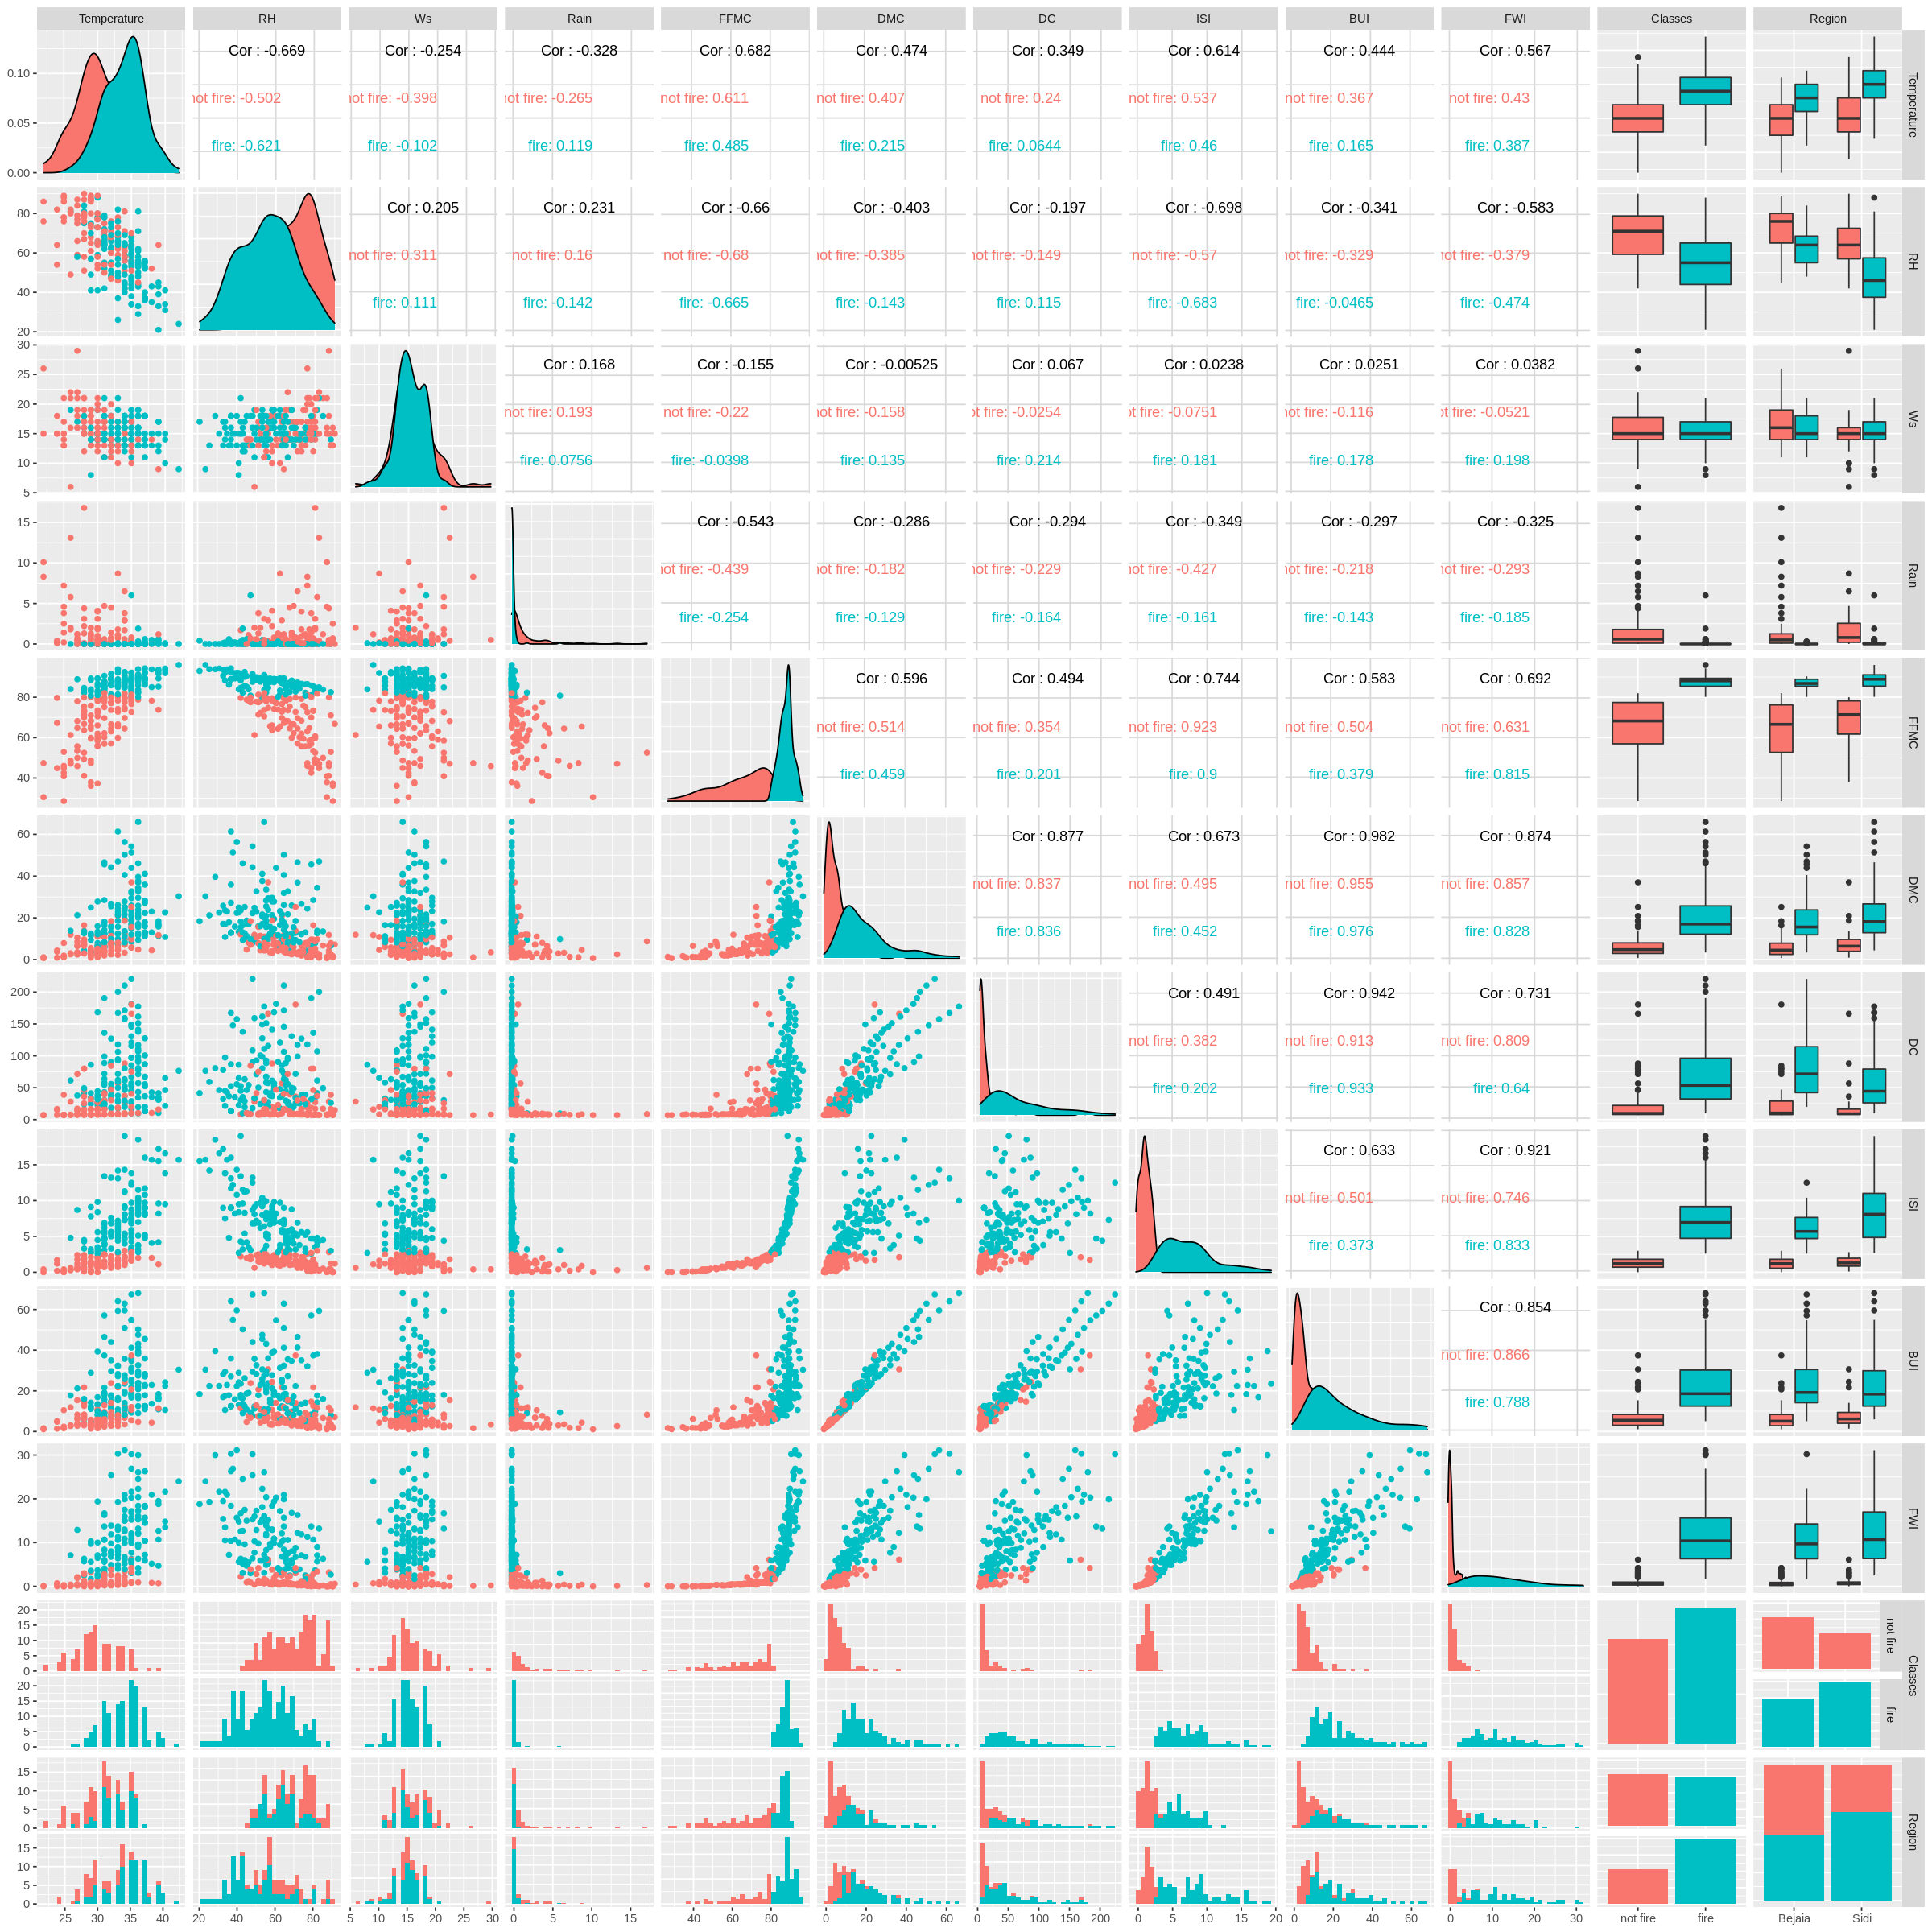

In [193]:
options(repr.plot.width=20, repr.plot.height=20)
forest_fires_cleaned %>% 
    ggpairs(aes(color = Classes))

Methods:
- Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?
 so i gotta research on what the stuff means. I lowkey want to do just a thing where they show the stuff


- Describe at least one way that you will visualize the results
using a 

Expected outcomes and significance:
- What do you expect to find?
expect to find that 
- What impact could such findings have?
if epople can predict forest fires then we can maybe be more prepared
- What future questions could this lead to?
maybe someone can do sthing more specific like see how big the forest fire will be based on information.


In [2]:
add reasons why predictors are selected.